<a href="https://colab.research.google.com/github/Jhaveth/Simulacion-ll/blob/Examen/Problema_16_Examen_Simulacion_ll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Presenta: Jhaveth Ghaell Martínez Gonzalez*

---

# **PROBLEMA** **16**

Dos personas han quedado en una cita en un determinado lugar. Ambas tienen la misma probabilidad de llegar al lugar de la cita en el intervalo de tiempo [0, 30]. 
Determínese la probabilidad de que el tiempo que una persona espere a la otra sea como máximo 10. 

---


---

# **Solución Analitíca**

El tiempo de espera tendrá una distribución uniforme en el intervalo [0, 30], ya que la otra persona puede llegar en cualquier momento dentro de ese intervalo.


Dado que la probabilidad se puede expresar como un área bajo la curva de la distribución uniforme, tenemos que:

Calculando la probabilidad respecto al gráfico que se obtiene de una distribución unifome con condición de máximo 10, tenemos que:  

$P(J-K \leq 10)=\frac{Área\ sombreada}{Área\ total}=\frac{500}{900}=\frac{5}{9}$= $55.56$  

Por lo tanto, se tiene que: la probabilidad de que el tiempo máximo de espera sea de 10 minutos, es del 55.56%.

---

# **Iniciando la metodología**

### **1. Identificaion de las variables**

En este caso, tendremos 2 variables:

Sea $p_1$=Tiempo de espera de la primera persona.  
Sea $p_2$=Tiempo de espera de la segunda persona.

### **2. Determinar la distribución de probabilidad**

Se especifica que las dos personas tienen la misma probabilidad de llegar al lugar de la cita en el intervalo de tiempo [0, 30].

Por lo tanto tenemos que:

$p_1,  p_2∼U(0,30)$

### **3. Modelo de las variables aleatorias**

$p_1∼U(0,30)$  
$p_2∼U(0,30)$

### **4. Definicion del modelo del sistema y los objetivos de la simulación**

El sistema en este caso es la cita entre dos personas en un determinado lugar

Las variables del sistema son los tiempos de llegada de cada persona al lugar de la cita.

Se asume que estos tiempos de llegada siguen una distribución uniforme en el intervalo [0, 30].  

El objetivo de la simulación es obtener una estimación de la probabilidad de que el tiempo de espera sea como máximo 10 utilizando el modelo del sistema y generando múltiples escenarios de llegada de las dos personas.

In [46]:
import numpy as np
import random 
import matplotlib.pyplot as plt 

In [47]:
def llegada():
  per1=0  #Variable de tiempo de persona1
  per2=0  #Variable de tiempo de persona2
  p1=random.randrange(0, 30, 1) #Generar tiempo de llegada de persona 1
  p2=random.randrange(0, 30, 1) #Generar tiempo de llegada de persona 2
  if p1<p2: #Determinar quien llega primero
    per1=p1
    per2=p2
  else:
    per1=p2
    per2=p1
  tes=per2-per1 #Calcular el tiempo de espera
  return(tes) 

In [48]:
def simulacion(n):
  tiempos=[] #lista de tiempos 
  reg=0 #contador de registros 
  for i in range(n):
    if llegada()<=10: #Se verifica si el tiempo de espera es menor o igual a 10
      reg=reg+1
      tiempos.append(reg/(i+1)) 
  return(tiempos)

###**5. Diseñe el experimento**

In [49]:
sim=simulacion(120) #hacemos una variable para las simulaciones

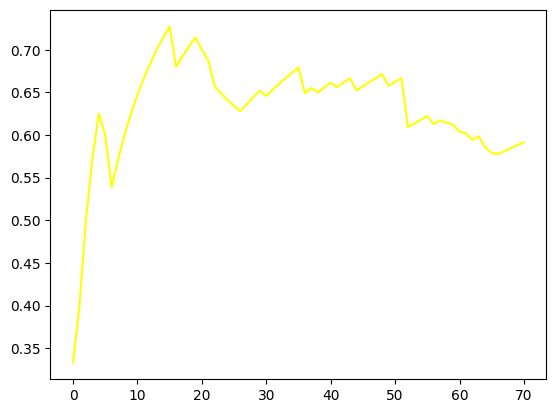

In [50]:
plt.plot(sim, color="yellow") #Gráfica de las simulaciones

In [51]:
np.mean(sim) #Calculo de media de las simulaciones

0.6304178222860123

In [52]:
def modelo(n):
    l=[]
    for i in range(n):
        s = simulacion(100)
        l.append(np.mean(s)) 
    return l

###**6. Repita el experimento $n$ veces**

In [53]:
mod=modelo(50) #Repetir modelo un determinado número de veces más

In [54]:
print(np.mean(mod), np.std(mod))

0.5977942105600041 0.05422516733449264


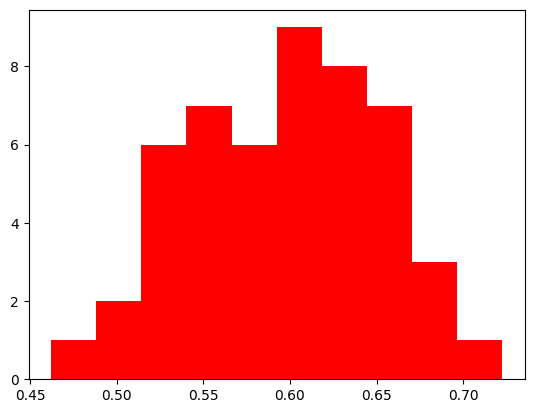

In [55]:
plt.hist(mod, color="red") #Gráfica del histograma
plt.show()

###**7. Hallar el intervalo de confianza**

In [56]:
int1= np.mean(mod)-(1.96)*(np.var(mod))/np.sqrt(50)
int2= np.mean(mod)+(1.96)*(np.var(mod))/np.sqrt(50) 

print("El intervalo de confianza es: ",int1, "<",np.mean(mod),"<",int2)
print("es decir, ")
print("El intervalo de confianza es: ",
np.mean(mod)-(1.96)*((np.var(mod))/np.sqrt(50)), "≤ X̅ ≤",
np.mean(mod)+(1.96)*((np.var(mod))/np.sqrt(50)))




El intervalo de confianza es:  0.5969791819183132 < 0.5977942105600041 < 0.5986092392016951
es decir, 
El intervalo de confianza es:  0.5969791819183132 ≤ X̅ ≤ 0.5986092392016951
